In [ ]:
import sklearn as sk
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import matplotlib
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
from sklearn.model_selection import train_test_split

In [ ]:
moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    moons[0], moons[1], test_size=0.3, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 2), (300, 2), (700,), (300,))

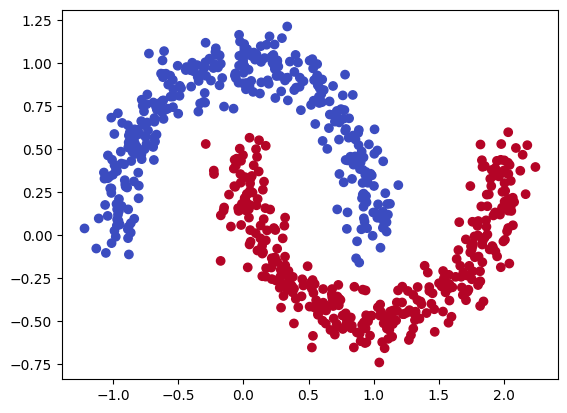

In [ ]:
plt.scatter(x=X_train[:,0],y=X_train[:,1],c=y_train, cmap="coolwarm")


In [ ]:
X=torch.tensor(X_train).float()
Y=torch.tensor(y_train).float().unsqueeze(dim=1)
x_test=torch.tensor(X_test).float()
y_test=torch.tensor(y_test).float().unsqueeze(dim=1)
X.shape,Y.shape,x_test.shape,y_test.shape


(torch.Size([700, 2]),
 torch.Size([700, 1]),
 torch.Size([300, 2]),
 torch.Size([300, 1]))

In [ ]:
class Module_0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=32)
        self.layer_2=nn.Linear(in_features=32,out_features=32)
        self.layer_3=nn.Linear(in_features=32,out_features=1)

        self.relu=nn.ReLU()
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


moons_Module=Module_0()

with torch.inference_mode():
    moons_Module(X)


In [ ]:
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc


In [ ]:
epochs=1000
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=moons_Module.parameters(),lr=0.5)
for epoch in range(epochs):
    moons_Module.train()
    y_logits = moons_Module(X)
    loss = loss_fn(y_logits, Y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        moons_Module.eval()
        with torch.no_grad():
            test_logits = moons_Module(x_test)
            test_probs = torch.sigmoid(test_logits)
            test_preds = (test_probs >= 0.5).float()
            acc = accuracy_fn(y_test, test_preds)

        print(f"Epoch {epoch} | Loss {loss:.4f} | Acc {acc:.2f}%")


Epoch 0 | Loss 0.7008 | Acc 71.00%
Epoch 10 | Loss 0.3899 | Acc 84.33%
Epoch 20 | Loss 0.2975 | Acc 88.33%
Epoch 30 | Loss 0.2578 | Acc 90.00%
Epoch 40 | Loss 0.2331 | Acc 92.33%
Epoch 50 | Loss 0.2103 | Acc 92.67%
Epoch 60 | Loss 0.1856 | Acc 93.67%
Epoch 70 | Loss 0.1586 | Acc 95.33%
Epoch 80 | Loss 0.1335 | Acc 96.33%
Epoch 90 | Loss 0.1488 | Acc 94.67%
Epoch 100 | Loss 0.0882 | Acc 98.33%
Epoch 110 | Loss 0.0696 | Acc 99.33%
Epoch 120 | Loss 0.0552 | Acc 100.00%
Epoch 130 | Loss 0.0448 | Acc 100.00%
Epoch 140 | Loss 0.0375 | Acc 100.00%
Epoch 150 | Loss 0.0321 | Acc 100.00%
Epoch 160 | Loss 0.0279 | Acc 100.00%
Epoch 170 | Loss 0.0246 | Acc 100.00%
Epoch 180 | Loss 0.0219 | Acc 100.00%
Epoch 190 | Loss 0.0198 | Acc 100.00%
Epoch 200 | Loss 0.0180 | Acc 100.00%
Epoch 210 | Loss 0.0165 | Acc 100.00%
Epoch 220 | Loss 0.0152 | Acc 100.00%
Epoch 230 | Loss 0.0141 | Acc 100.00%
Epoch 240 | Loss 0.0132 | Acc 100.00%
Epoch 250 | Loss 0.0123 | Acc 100.00%
Epoch 260 | Loss 0.0116 | Acc 100.0

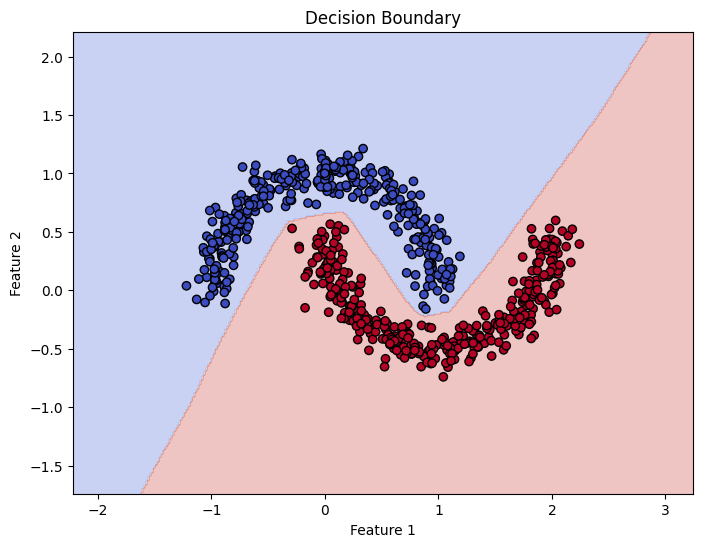

In [ ]:
moons_Module.eval()
# Define grid limits
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

# Create grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Convert grid to tensor
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)
with torch.no_grad():
    logits = moons_Module(grid_tensor)
    probs = torch.sigmoid(logits)
    preds = (probs >= 0.5).float()
Z = preds.numpy().reshape(xx.shape)
plt.figure(figsize=(8, 6))

# Draw background classification map
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="coolwarm", edgecolors="k")

plt.title("Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
